### Importing the relevant packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import cv2
import datetime, os
import string
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorboard
from tensorboard.plugins.hparams import api as hp

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, SpatialDropout2D, BatchNormalization, Input,Activation, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, save_model

### Downloading and Preprocessing the Dataset

In [3]:
# Set the path for the training dataset and define the labels
train_path = "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Data/asl_alphabet_train/asl_alphabet_train"
labels = []
alphabet = list(string.ascii_uppercase)
labels.extend(alphabet)
labels.extend(["del", "nothing", "space"])
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


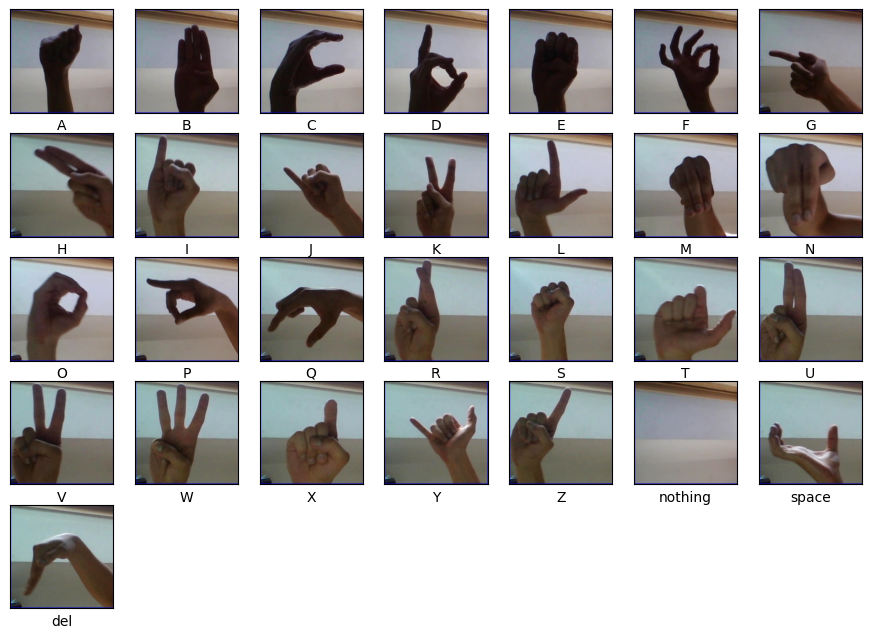

In [4]:
# Set the paths for the training and testing directories
train_dir = 'D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_train/asl_alphabet_train'
test_dir = 'D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_train/asl_alphabet_test'

# Defining the classes
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']


# Display sample images from the training directory
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

<Axes: ylabel='count'>

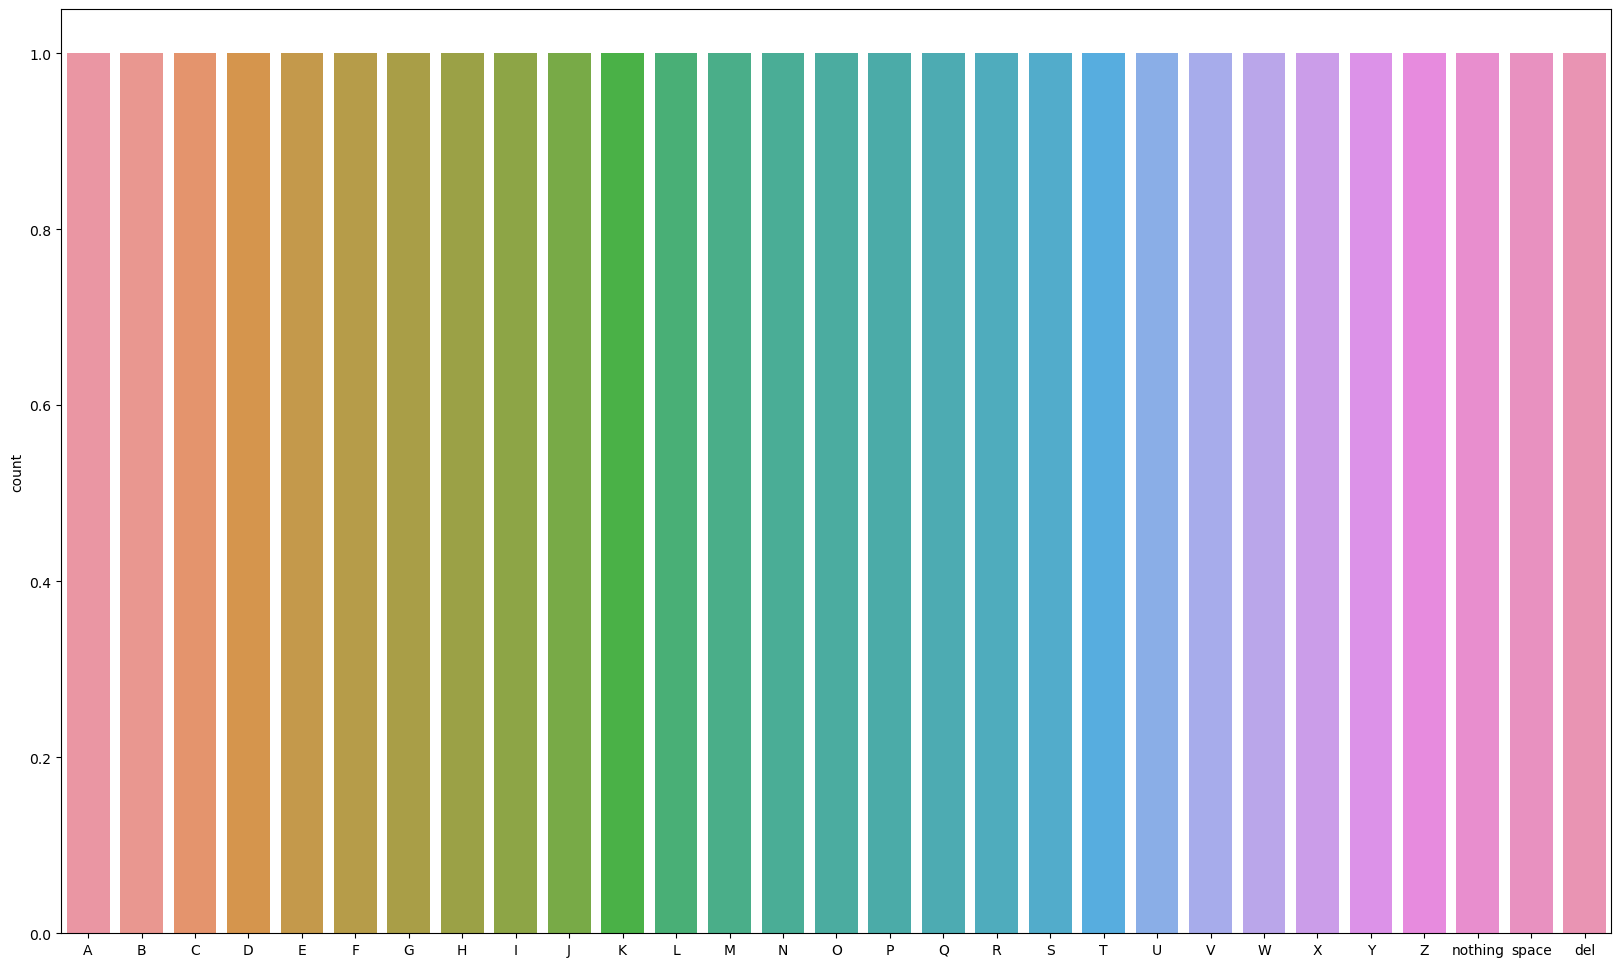

In [5]:
# List the files in the directory
files = os.listdir(train_dir)

# Create a Pandas DataFrame from the list of files
train_df = pd.DataFrame({"image_path": files})

# Create a count plot of the labels
plt.figure(figsize=(20, 12))
sns.countplot(data=train_df, x=classes)

All Classes are equally distrbuted

In [6]:
# Prepare the dataset for training
list_path = []
list_labels = []
for label in labels:
    label_path = os.path.join(train_dir, label, "*")
    image_files = glob.glob(label_path)
    
    sign_label = [label] * len(image_files)
    
    list_path.extend(image_files)
    list_labels.extend(sign_label)

# Create a DataFrame with image paths and labels
df = pd.DataFrame({"image_path": list_path, "label": list_labels})
df

,image_path,label
0,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,A
1,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,A
2,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,A
3,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,A
4,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,A
...,...,...
86995,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,space
86996,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,space
86997,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,space
86998,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,space


In [7]:
# Create an ImageDataGenerator for data augmentation
image_generator=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
image_generator=ImageDataGenerator(rescale=1/255)

In [8]:
# Split the dataset into train, validation, and test sets
#Train 0.7, Val 0.15, and Test 0.15
X_train, X_test, y_train, y_test = train_test_split(df["image_path"], df["label"], 
    test_size=0.15, 
    random_state=2023, 
    shuffle=True, 
    stratify=df["label"]
)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    data_train["image_path"], data_train["label"],
    test_size=0.15/0.70,
    random_state=2023,
    shuffle=True,
    stratify=data_train["label"]
)

In [9]:
data_train = pd.DataFrame({"image_path": X_train,"label": y_train})
data_train

,image_path,label
19553,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,G
9314,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,D
25312,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,I
56151,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,S
66845,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,W
...,...,...
58472,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,T
15926,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,F
82033,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,nothing
39954,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,N


In [11]:
data_train = pd.DataFrame({"image_path": X_train, "label": y_train})
data_train

,image_path,label
51901,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,R
51887,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,R
5050,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,B
29446,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,J
58405,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,T
...,...,...
47111,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,P
83611,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,nothing
67329,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,W
85296,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,space


In [12]:
data_val = pd.DataFrame({"image_path": X_val,"label": y_val})
data_val

,image_path,label
24961,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,I
71053,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,X
73637,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,Y
72875,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,Y
40669,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,N
...,...,...
16474,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,F
62741,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,U
32281,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,K
20451,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,G


In [13]:
data_test = pd.DataFrame({"image_path": X_test,"label": y_test})
data_test

,image_path,label
73327,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,Y
85482,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,space
65607,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,V
53903,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,R
64425,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,V
...,...,...
40578,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,N
28949,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,J
42094,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,O
5425,D:/Mohamed Sheriff/Projects/Git Projects/Ameri...,B


In [14]:
# Create ImageDataGenerators for training, validation, and testing
Training = image_generator.flow_from_dataframe(data_train,target_size=(64,64),batch_size=64,
                                               class_mode='categorical', directory="./", x_col="image_path",y_col="label")

Validation = image_generator.flow_from_dataframe(data_val , target_size=(64,64),batch_size=64,class_mode='categorical',
                                                 directory="./", x_col="image_path",y_col="label")

Test = image_generator.flow_from_dataframe(data_test,target_size=(64,64),batch_size=64,class_mode='categorical',
                                             directory="./", x_col="image_path",y_col="label")

Found 58103 validated image filenames belonging to 29 classes.
Found 15847 validated image filenames belonging to 29 classes.
Found 13050 validated image filenames belonging to 29 classes.


In [14]:
Training.n, Test.n , Validation.n 

(58103, 13050, 15847)

### Defining hyperparameters

In [18]:
# Defining the hypermatarest we would test and their range
HP_FILTER_SIZE = hp.HParam('filter_size', hp.Discrete([3,5,7]))
HP_NODES = hp.HParam('nodes', hp.Discrete([512, 1024, 2048]))

METRIC_ACCURACY = 'accuracy'

# Logging setup info
with tf.summary.create_file_writer('D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Logs/hparam_tuning/').as_default():
    hp.hparams_config(
        hparams=[HP_FILTER_SIZE, HP_NODES],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

In [19]:
# Set the number of epochs and create a TensorBoard callback for logging 
num_epochs = 10

# Define the number of steps per epoch for training, validation, and testing
train_step=Training.n//Training.batch_size
test_step=Test.n//Test.batch_size
valid_step =Validation.n//Validation.batch_size

## Creating functions for training our model and for logging purposes

In [22]:
# Wrapping our model and training in a function with the specified hyperparameters

def train_test_model(hparams):
    
    # Outlining the model/architecture of our CNN
    model = Sequential()
    model.add(Conv2D(64, hparams[HP_FILTER_SIZE], padding='same', input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, hparams[HP_FILTER_SIZE], padding='same', input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(256, hparams[HP_FILTER_SIZE], padding='same', input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(hparams[HP_NODES], activation='relu'))
    model.add(Dense(29, activation='softmax'))
        

    # Compile the model
    model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    log_dir = "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

    # Defining early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        mode = 'auto',
        min_delta = 0,
        patience = 2,
        verbose = 0, 
        restore_best_weights = True
        )

    model.fit(Training,
              steps_per_epoch=train_step,
              epochs=num_epochs, 
              validation_data=Validation,
              validation_steps=valid_step,
              callbacks=[tensorboard_callback, early_stopping]
                )
    
    _, accuracy = model.evaluate(Test, steps=test_step)

    return accuracy
    
    

In [23]:
# Creating a function to log the results
def run(log_hp, hparams):
    
    with tf.summary.create_file_writer(log_hp).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

### Training the model with the different hyperparameters

In [25]:
# Performing a grid search on the hyperparameters we need to test
session_num = 0

for filter_size in HP_FILTER_SIZE.domain.values:
    for nodes in HP_NODES.domain.values:
        hparams = {
            HP_FILTER_SIZE: filter_size,
            HP_NODES: nodes
            }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run('D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Logs/hparam_tuning/' + run_name, hparams)

        session_num += 1

--- Starting trial: run-0
{'filter_size': 3, 'nodes': 512}
Epoch 1/10
907/907 [==============================] - 2965s 3s/step - loss: 0.8195 - accuracy: 0.7600 - val_loss: 1.6242 - val_accuracy: 0.6489
Epoch 2/10
907/907 [==============================] - 2774s 3s/step - loss: 0.1199 - accuracy: 0.9610 - val_loss: 0.8570 - val_accuracy: 0.7984
Epoch 3/10
907/907 [==============================] - 1347s 1s/step - loss: 0.0755 - accuracy: 0.9766 - val_loss: 0.9452 - val_accuracy: 0.8300
Epoch 4/10
907/907 [==============================] - 907s 998ms/step - loss: 0.0662 - accuracy: 0.9819 - val_loss: 0.1135 - val_accuracy: 0.9651
Epoch 5/10
907/907 [==============================] - 894s 986ms/step - loss: 0.0518 - accuracy: 0.9860 - val_loss: 0.5663 - val_accuracy: 0.8873
Epoch 6/10
907/907 [==============================] - 912s 1s/step - loss: 0.0529 - accuracy: 0.9869 - val_loss: 0.0212 - val_accuracy: 0.9932
Epoch 7/10
907/907 [==============================] - 926s 1s/step - loss:

203/203 [==============================] - 856s 4s/step - loss: 0.8747 - accuracy: 0.7521


### TensorBoard Visualization

TensorBoard is a web-based visualization tool provided by TensorFlow. It is used for visualizing and analyzing various aspects of machine learning models. TensorBoard allows you to monitor and track metrics, visualize the model graph, analyze training progress, and explore embeddings, among other functionalities. It provides an interactive and intuitive interface for gaining insights into the model's performance and behavior.

In [27]:
# Starting TensorBoard
%load_ext tensorboard

In [28]:
# Loading and displaying TensorBoard logs
%tensorboard --logdir "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Logs/hparam_tuning"

In [ ]:
#Reload the TensorBoard extension, which ensures that any updated code or settings are applied correctly. [If needed!]
%reload_ext tensorboard

# TO Kill TensorBorad using CMD and Delete Temp files use the following -->
#    taskkill /im tensorboard.exe /f
#    del /q %TMP%\.tensorboard-info\*

- Best Accuracy for the ASL Model [ filter size(kernels) 3,3, Dense (nodes) 512 ] with accuracy 99.3%

### Re-Define and Compile the model with the best hyperparameters

In [37]:
# Load the best model using the best hyperparameters
best_model = Sequential()
best_model.add(Conv2D(64, 3, padding='same', input_shape=(64, 64, 3), activation='relu'))
best_model.add(MaxPooling2D(pool_size=(2, 2)))
best_model.add(BatchNormalization())

best_model.add(Conv2D(128, 3, padding='same', input_shape=(64, 64, 3), activation='relu'))
best_model.add(MaxPooling2D(pool_size=(2, 2)))
best_model.add(BatchNormalization())
best_model.add(Dropout(0.2))

best_model.add(Conv2D(256, 3, padding='same', input_shape=(64, 64, 3), activation='relu'))
best_model.add(MaxPooling2D(pool_size=(2, 2)))
best_model.add(BatchNormalization())

best_model.add(Flatten())
best_model.add(Dropout(0.2))
best_model.add(Dense(512, activation='relu'))
best_model.add(Dense(29, activation='softmax'))

# Compile the model
best_model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
# Train the model using the best hyperparameters
best_model.fit(Training,
               steps_per_epoch=train_step,
               epochs=num_epochs,
               validation_data=Validation,
               validation_steps=valid_step)


Epoch 1/10
907/907 [==============================] - 3626s 4s/step - loss: 0.8623 - accuracy: 0.7560 - val_loss: 4.0060 - val_accuracy: 0.4258
Epoch 2/10
907/907 [==============================] - 610s 672ms/step - loss: 0.1282 - accuracy: 0.9599 - val_loss: 1.1838 - val_accuracy: 0.7637
Epoch 3/10
907/907 [==============================] - 646s 713ms/step - loss: 0.0727 - accuracy: 0.9784 - val_loss: 1.2702 - val_accuracy: 0.7503
Epoch 4/10
907/907 [==============================] - 670s 739ms/step - loss: 0.0624 - accuracy: 0.9821 - val_loss: 0.5142 - val_accuracy: 0.8830
Epoch 5/10
907/907 [==============================] - 763s 841ms/step - loss: 0.0479 - accuracy: 0.9871 - val_loss: 0.2425 - val_accuracy: 0.9290
Epoch 6/10
907/907 [==============================] - 728s 803ms/step - loss: 0.0449 - accuracy: 0.9887 - val_loss: 1.1821 - val_accuracy: 0.8429
Epoch 7/10
907/907 [==============================] - 674s 742ms/step - loss: 0.0531 - accuracy: 0.9871 - val_loss: 0.3693 - v

In [39]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                        

### Save and Load Model from the specified path

In [38]:
save_model = best_model.save('D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Model/ASL.keras')

In [15]:
# The loaded model is used for inference, evaluation, or further training
new_model = keras.models.load_model('D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Model/ASL.keras')

In [20]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = new_model.evaluate(Test, steps=test_step)
print("Test accuracy:", test_accuracy)

203/203 [==============================] - 554s 3s/step - loss: 0.1249 - accuracy: 0.9767
Test accuracy: 0.9766779541969299


### Evaluation and Testing

In [21]:
Test.samples , Test.batch_size

(13050, 64)

In [22]:
# Get all the test samples and labels
test_samples = []
test_labels = []
num_batches = Test.samples // Test.batch_size  # Total number of batches

In [23]:
for _ in range(num_batches):
    batch_samples, batch_labels = Test.next()
    test_samples.append(batch_samples)
    test_labels.append(batch_labels)

In [24]:
# Concatenate the samples and labels from all batches
test_samples = np.concatenate(test_samples)
test_labels = np.concatenate(test_labels)

In [25]:
# Generate predictions on the test samples
test_predictions = new_model.predict(test_samples)

406/406 [==============================] - 26s 64ms/step


In [26]:
# Calculate the predicted class indices
predicted_class_indices = np.argmax(test_predictions, axis=1)

# Calculate the true class indices
true_class_indices = np.argmax(test_labels, axis=1)

In [27]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(true_class_indices, predicted_class_indices)

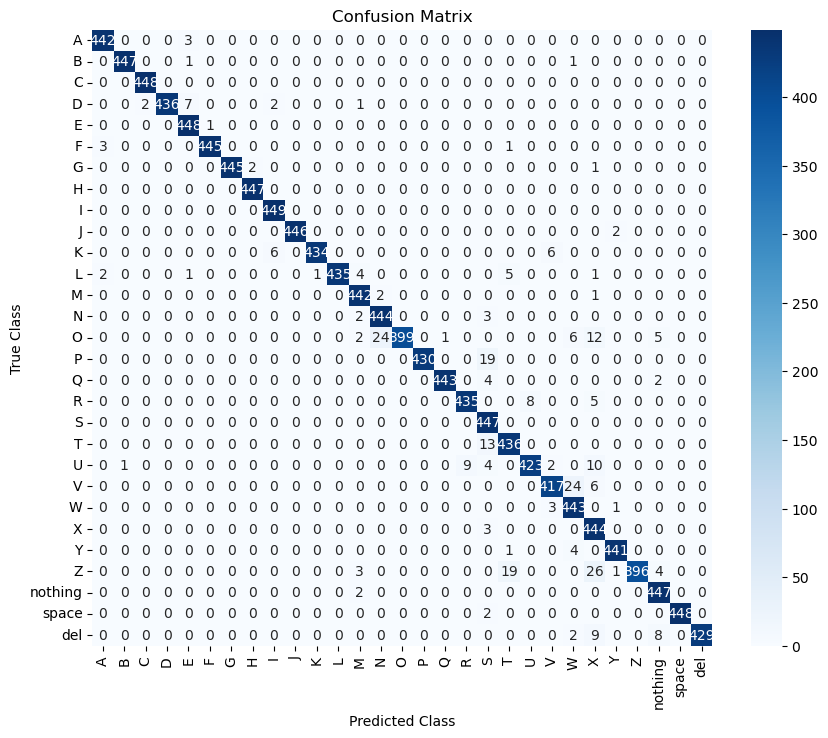

In [28]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

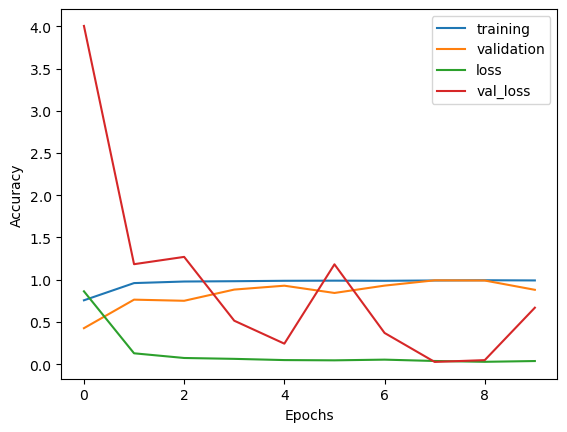

In [40]:
# Plotting the training and validation accuracy and loss
plt.plot(best_model.history.history['accuracy'],label='training')
plt.plot(best_model.history.history['val_accuracy'],label='validation')
plt.plot(best_model.history.history["loss"],label='loss')
plt.plot(best_model.history.history["val_loss"],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


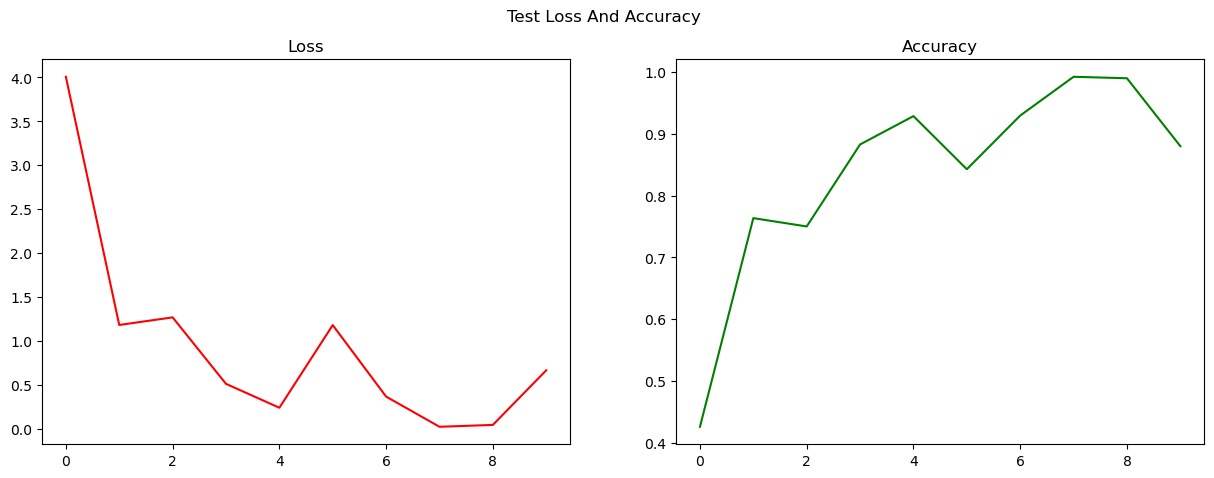

In [41]:
# Plotting the test loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Test Loss And Accuracy')

sns.lineplot(ax=ax[0], data=best_model.history.history['val_loss'], color='r')
ax[0].set_title('Loss')

sns.lineplot(ax=ax[1], data=best_model.history.history['val_accuracy'], color='g')
ax[1].set_title('Accuracy')

plt.show()

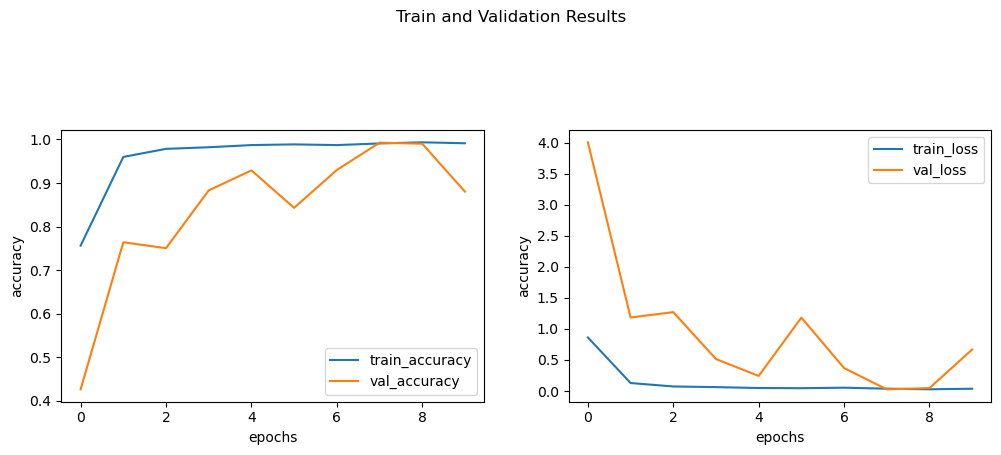

In [42]:
# Function to plot the training and validation results
def plot_results(model):
    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(best_model.history.history['accuracy'], label = 'train_accuracy')
    plt.plot(best_model.history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(best_model.history.history['loss'], label = 'train_loss')
    plt.plot(best_model.history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.suptitle('Train and Validation Results')
    plt.legend()
    plt.show()

plot_results(best_model)


In [44]:
# Load the test dataset and preprocess it
test_image_paths = [
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/A_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/B_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/C_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/D_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/del_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/E_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/F_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/G_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/H_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/I_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/J_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/K_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/L_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/M_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/N_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/O_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/P_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/Q_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/R_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/S_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/space_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/T_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/U_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/V_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/W_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/X_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/Y_test.jpg",
    "D:/Mohamed Sheriff/Projects/Git Projects/American Sign Language Translator/Dataset/asl_alphabet_test/asl_alphabet_test/Z_test.jpg",
]

1/1 [==============================] - 0s 205ms/step


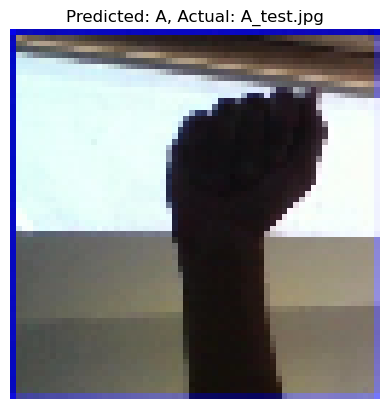

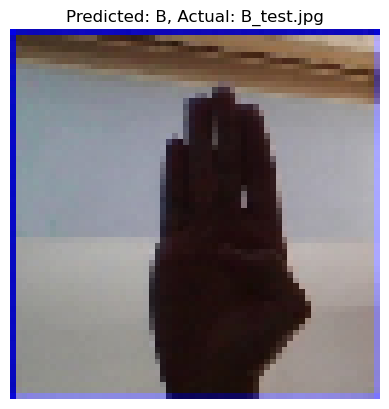

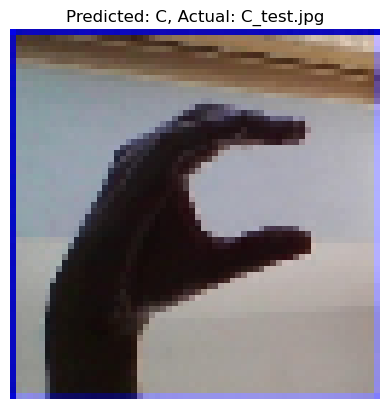

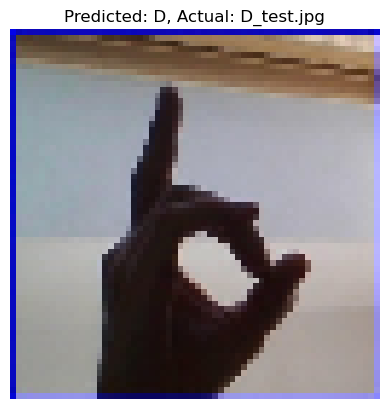

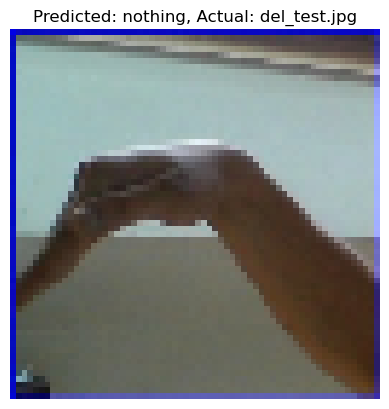

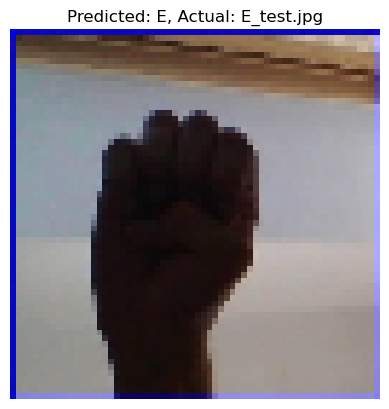

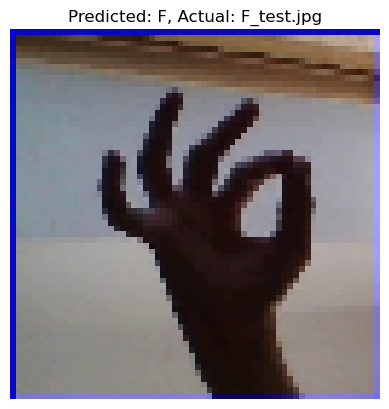

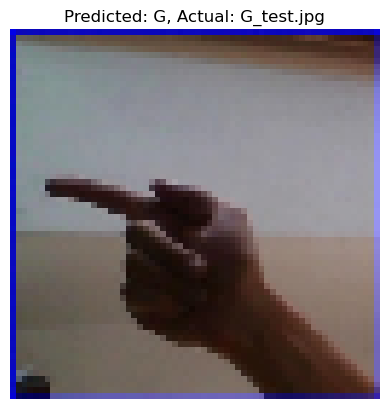

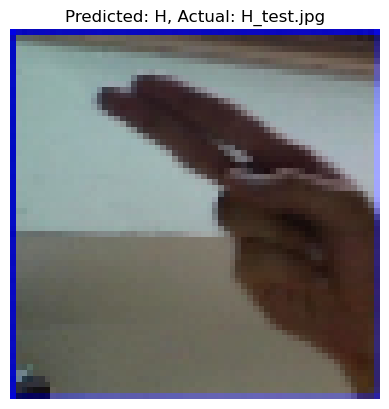

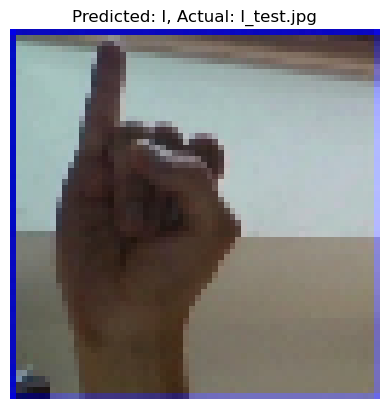

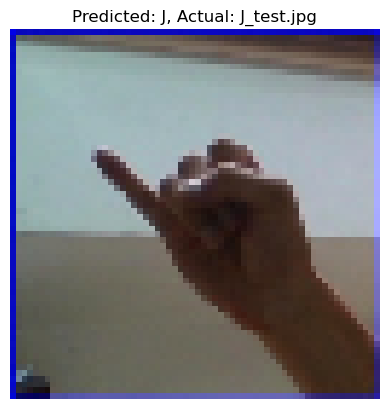

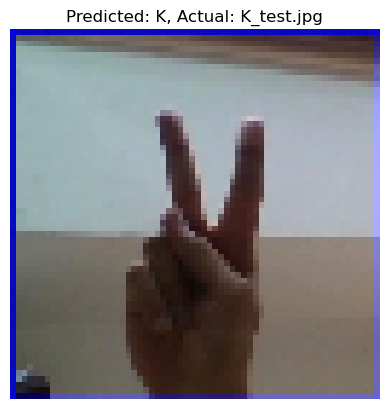

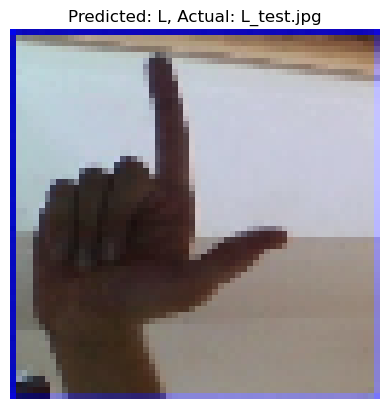

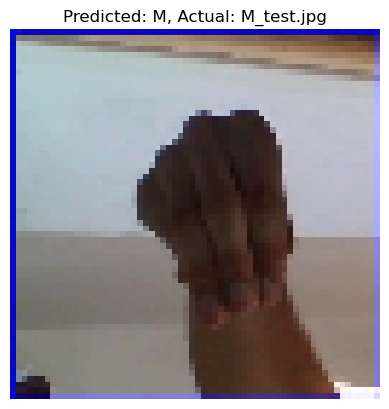

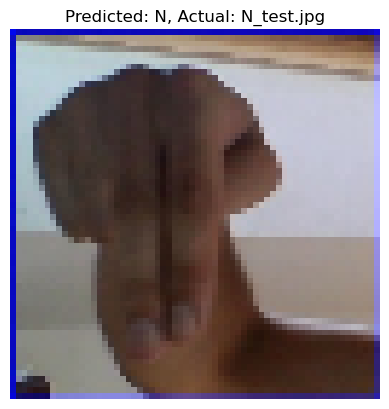

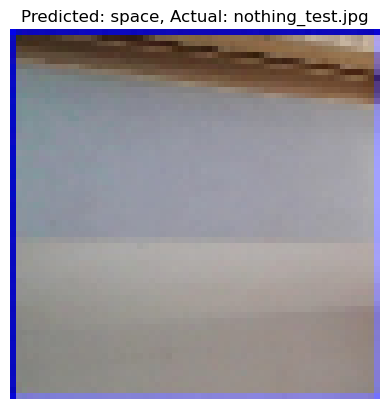

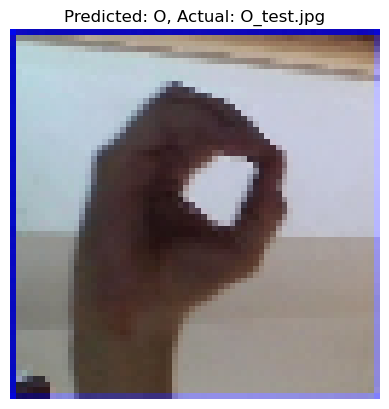

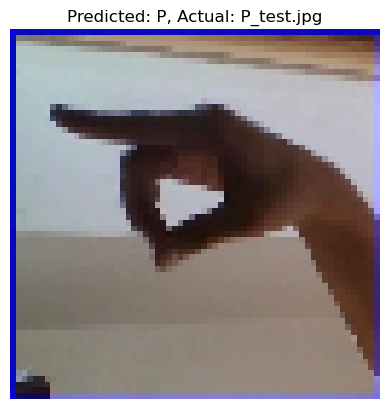

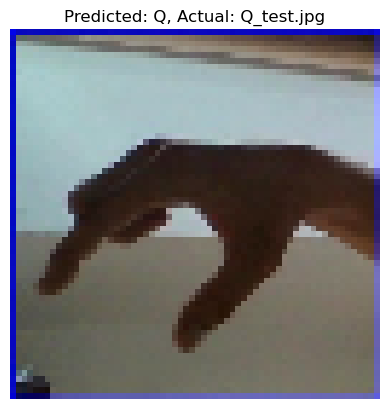

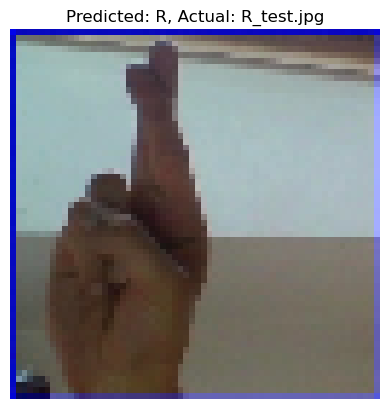

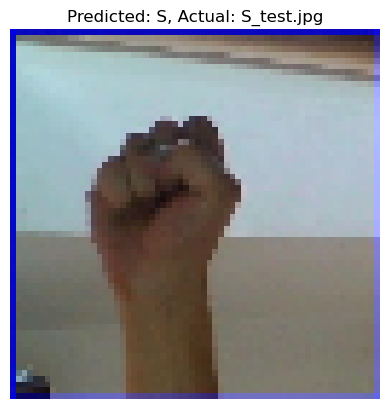

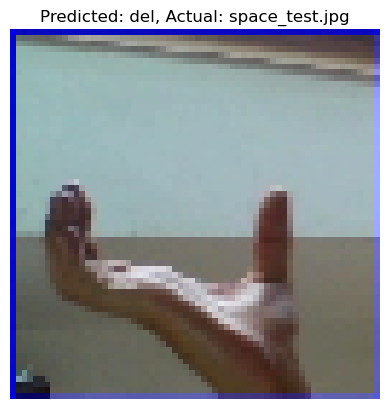

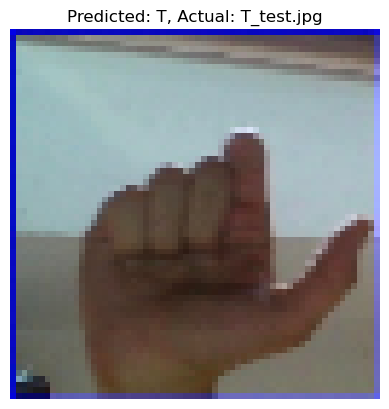

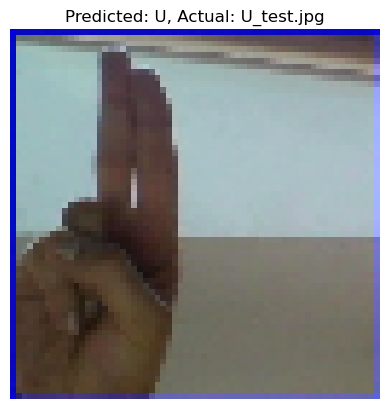

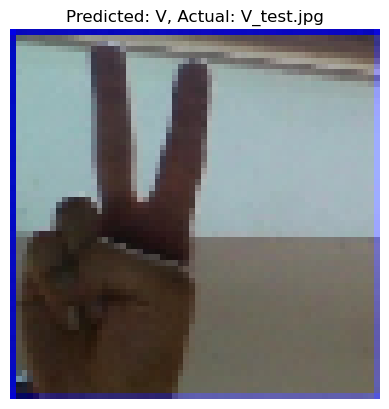

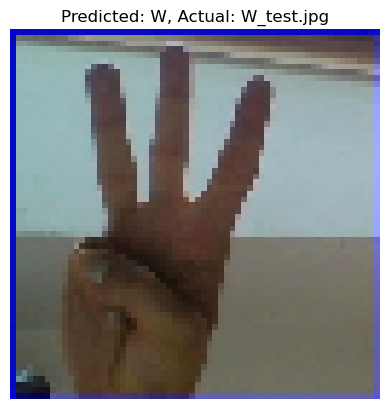

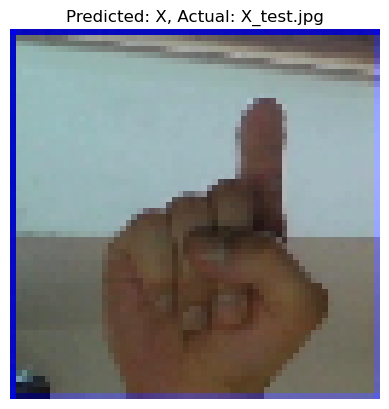

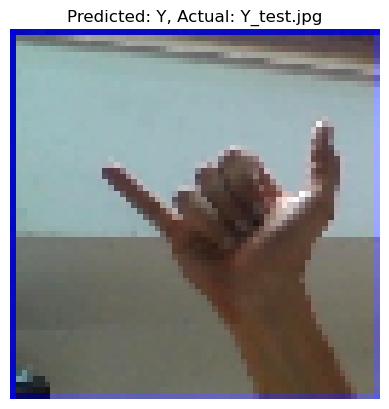

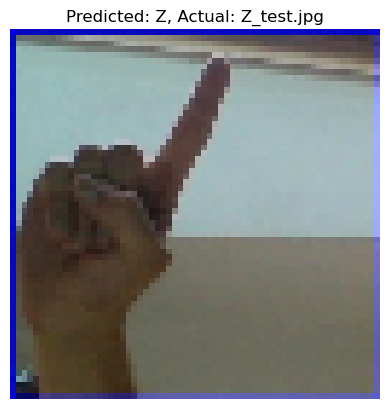

In [46]:
test_data = []  # List to store preprocessed test images
test_labels = []  # List to store actual class labels

for image_path in test_image_paths:
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = img_array.astype("float32") / 255.0
    test_data.append(img_array)
    
    # Extract the actual class label from the image path (assuming the images are organized in folders named after the class)
    actual_label = image_path.split("/")[-1]  # Replace with appropriate folder name separator if needed
    test_labels.append(actual_label)

# Convert the test data to a numpy array
test_data = np.array(test_data)

# Make predictions using the loaded model
predictions = new_model.predict(test_data)

# Get the predicted class labels for each image
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_class_labels = [classes[index] for index in predicted_class_indices]

# Visualize the predictions and actual labels for all images
for i in range(len(test_data)):
    plt.figure()
    plt.imshow(test_data[i])
    plt.title(f"Predicted: {predicted_class_labels[i]}, Actual: {test_labels[i]}")
    plt.axis("off")
    plt.show()